In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
heart_df = pd.read_csv("heart-disease.csv")
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
over_50 = heart_df[heart_df["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [31]:
len(over_50) # find how many data present (row)

208

In [32]:
# Scatter plot of age and chol column

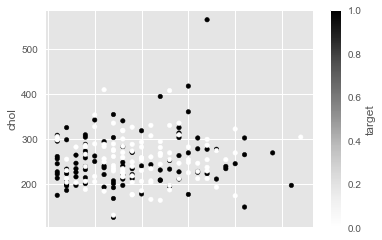

In [33]:
# pyplot
over_50.plot(
    x="age", # select column data
    y="chol",
    kind="scatter", # select type of graph
    c="target" # select color based on data
);


In [34]:
## Before we learn OOP
# learn how to customize plots 

In [35]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

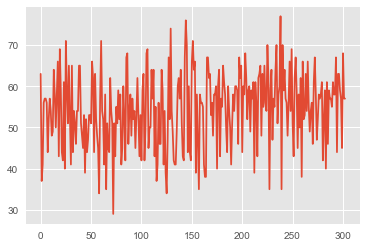

In [36]:
heart_df["age"].plot(); # default style

In [37]:
## Update matplotlib's style internally
plt.style.use("seaborn-whitegrid")

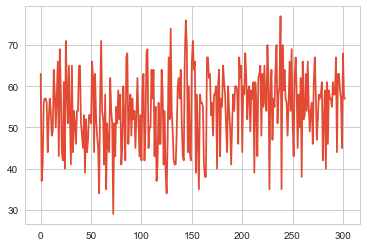

In [38]:
heart_df["age"].plot();

In [39]:
# Preferred 
plt.style.use("seaborn")

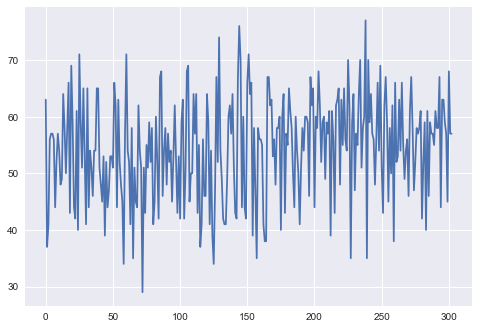

In [40]:
heart_df["age"].plot();

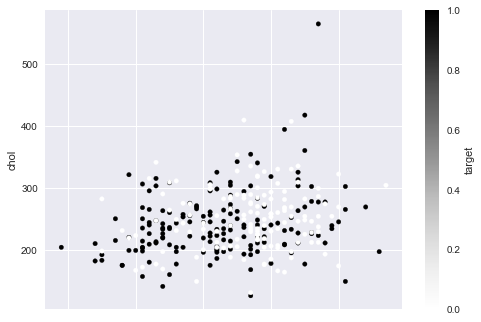

In [41]:
# pyplot
heart_df.plot(
    x="age",
    y="chol",
    kind="scatter",
    c="target"
);

In [42]:
# for histogram and bar --> ggplot style
plt.style.use("ggplot")

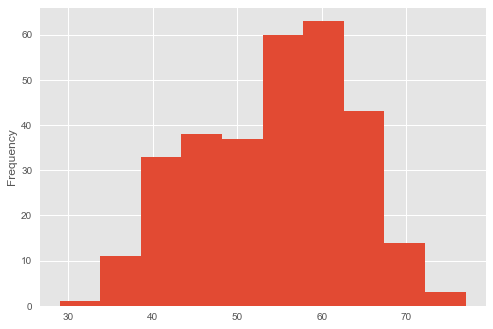

In [43]:
heart_df["age"].plot(kind="hist");

In [44]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [45]:
# ------------------------------------------------------------------

In [46]:
## OO method of plotting graphs with pandas

In [51]:
plt.style.use("seaborn-whitegrid")
# Change a style from within another style - cmap

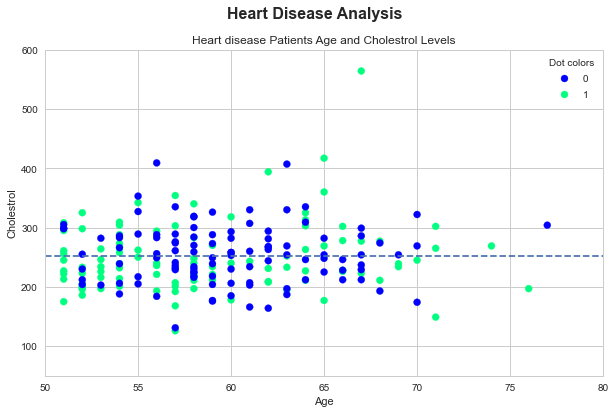

In [78]:
# Plot of age vs chol

# ax is the space where we are plotting
# figure is the entire box

# ax --> axes in the matplotlib plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot data by selecting dataframe column - scatter graph
scatter = ax.scatter(
    x=over_50["age"], # select column data for x-axis
    y=over_50["chol"], # select column data for y-axis
    c=over_50["target"], # change color based on the target column value
    cmap="winter" # this changes the colour scheme - check out other colors maps of matplotlib plot
);

# Customize the plot
ax.set(
    title="Heart disease Patients Age and Cholestrol Levels",
    xlabel="Age",
    ylabel="Cholestrol"
);

# Add a legend 
ax.legend(*scatter.legend_elements(),title="Dot colors");

# Set x and y axis limits
ax.set_ylim([50,600])
ax.set_xlim([50,80])

# Add a horizontal line - e.g. mean
ax.axhline(over_50["chol"].mean(),linestyle="--");

# *scatter.legend_elements() = grab the value from scatter and unpack the legend elements which
# will query the c parammeter by looking at the target column, and
# then create a legend field of those elements

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

# save the plot
fig.savefig("heart-disease_analysis_1.png")





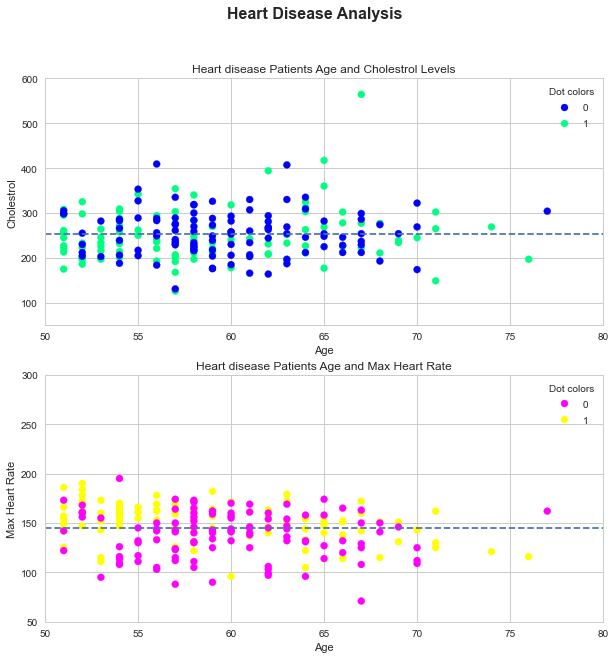

In [79]:
# Suplot of chol, age and thalach
# chol and thalach on y-axis, age on x-axis (columns of data frame)

# Create a single figure with 2 axis - ax0, ax1 
# when ploting subplots, no. of rows and cols must be mentioned
fig, (ax0,ax1) = plt.subplots(figsize=(10,10),nrows=2,ncols=1)

# Plot data of age and chol 
scatter = ax0.scatter(
    x=over_50["age"], 
    y=over_50["chol"],
    c=over_50["target"], 
    cmap="winter" 
);

# Customize the plot
ax0.set(
    title="Heart disease Patients Age and Cholestrol Levels",
    xlabel="Age",
    ylabel="Cholestrol"
);

# Add a legend 
ax0.legend(*scatter.legend_elements(),title="Dot colors");

# Set x and y axis limits
ax0.set_ylim([50,600])
ax0.set_xlim([50,80])

# Add a horizontal line - e.g. mean
ax0.axhline(over_50["chol"].mean(),linestyle="--");

# ------------------------------------------------------------

# Plot data of age and thalach 
scatter = ax1.scatter(
    x=over_50["age"], 
    y=over_50["thalach"],
    c=over_50["target"], 
    cmap="spring" 
);

# Customize the plot
ax1.set(
    title="Heart disease Patients Age and Max Heart Rate",
    xlabel="Age",
    ylabel="Max Heart Rate"
);

# Add a legend 
ax1.legend(*scatter.legend_elements(),title="Dot colors");

# Set x and y axis limits
ax1.set_ylim([50,300])
ax1.set_xlim([50,80])

# Add a horizontal line - e.g. mean
ax1.axhline(over_50["thalach"].mean(),linestyle="--");

# --------------------------------------------------------------

# Add a title to the figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold");

# save the plot
fig.savefig("heart-disease_analysis_2.png")

In [ ]:
# -------------------------------------------------------------------